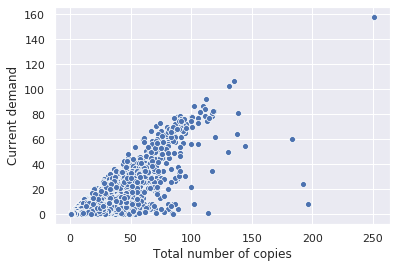

In [1]:
### Load dependencies and dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pathlib import Path
from scipy import stats
import numpy as np

data_folder = Path("../data/cleaned")
file_to_open = data_folder / 'by_titles.csv'

### Create dataframe
df = pd.read_csv(file_to_open)

fiz = sns.scatterplot(x = df["Total"], y = df["Demanded"])
fiz.set(xlabel='Total number of copies', ylabel='Current demand')
fiz.plot([0, 0], [80, 80], linewidth=2)
fiz = fiz.get_figure()

Auteur
A D G                      0.0
A, Alex                 1039.0
A, Cookie                  0.0
ADan                       0.0
AMA Jor te                 0.0
                         ...  
Östlundh, Hakan            0.0
Öttl, Christine            2.0
Özdamar, Emine Sevgi       0.0
Özlü, Tezer                0.0
Ümit, Ahmet                0.0
Name: Demanded, Length: 132885, dtype: float64


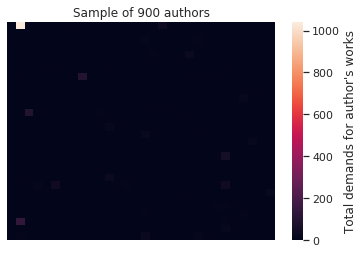

In [2]:

### Count current demand for all titles by an author
authors = df['Auteur'].unique()

author_demands= df.groupby('Auteur')['Demanded'].sum()
print(author_demands)

# Subsample 900 datapoints for plotting
author_demands = author_demands[:900]
data = np.asarray(author_demands).reshape(30,30)

### Make histogram of current demand
ax = sns.heatmap(data, cbar_kws={'label': "Total demands for author's works"})
plt.axis('off')
ax.set_title('Sample of 900 authors')
fig = ax.get_figure()

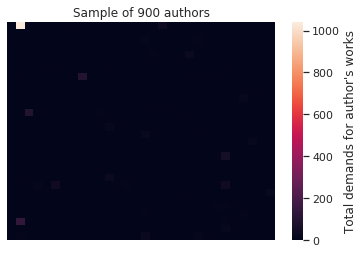

In [3]:
# Subsample 900 datapoints for plotting

author_demands = author_demands[:900]
data = np.asarray(author_demands).reshape(30,30)

### Make histogram of current demand
ax = sns.heatmap(data, cbar_kws={'label': "Total demands for author's works"})
plt.axis('off')
ax.set_title('Sample of 900 authors')
fig = ax.get_figure()

Text(0.5, 1, 'Demands per title for 2489 books')

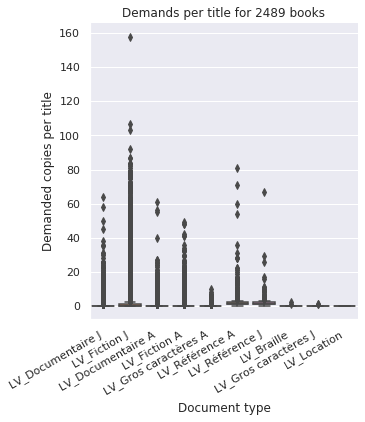

In [4]:

### Make new dataframe from x and y, and plot
ax = sns.catplot(y='Demanded',x='Type-document',kind = 'box',data=df)
ax.set_axis_labels('Document type','Demanded copies per title')
ax.set_xticklabels(rotation=30,ha='right')
plt.title("Demands per title for 2489 books")

In [5]:
### Count current demand for all titles by an author
publishers = df['Editeur'].unique()

df.groupby('Editeur')['Demanded'].sum()


Editeur
a&bpubl                                0.0
a&cblack                               6.0
a&i                                    0.0
a&mlessard                             0.0
a&npub                                 0.0
                                      ... 
évangélisation2000éditioncatholique    0.0
éveil&découvertes                      1.0
éveiletdécouvertes                     3.0
éveilleur                              0.0
éveilnature                            0.0
Name: Demanded, Length: 18644, dtype: float64

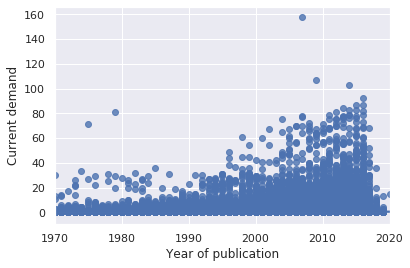

In [6]:
fiz = sns.regplot(x="Annee", y="Demanded", data=df)
fiz.set(xlabel='Year of publication', ylabel='Current demand')
plt.xlim(1970, 2020)
fiz = fiz.get_figure()

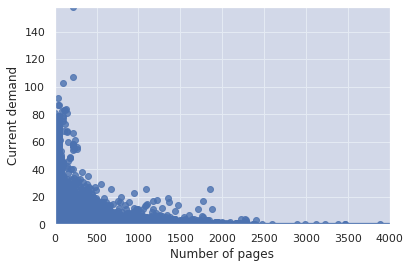

In [10]:
fiz = sns.regplot(x="Nombre-pages", y="Demanded", data=df)
fiz.set(xlabel='Number of pages', ylabel='Current demand')
plt.ylim(0, 158)
plt.xlim(0, 4000)
fiz = fiz.get_figure()

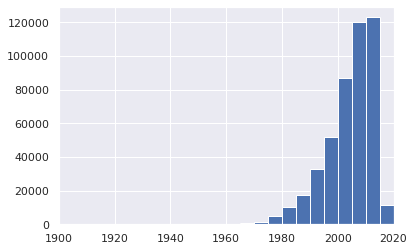

In [8]:
### Make histogram of years of publication
binwidth=5
df['Annee'].hist(bins=range(min(df['Annee']), max(df['Annee']) + binwidth, binwidth))
plt.xlim(1900, 2020)
plt.show()